# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [25]:
import pandas as pd  # pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # matplotlib library for creating plots
import numpy as np  # numpy library for numerical computing
import seaborn as sns  # seaborn library for statistical data visualization

In [26]:
mobile_price_df=pd.read_csv("/Users/jenny/Downloads/Mobile_Price_Data.csv") # Importing the dataset
mobile_price_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0


In [27]:
# Display the first few rows of the DataFrame
mobile_price_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [28]:
# Display the last few rows of the DataFrame
mobile_price_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0
1999,510,1,2.0,1,5,1,45.0,0.9,168,6,...,483,754.0,3919.0,19,4,2,1.0,1,1,3


In [29]:
# Display the shape of the DataFrame shows the number of rows and columns
mobile_price_df.shape

(2000, 21)

In [30]:
#  Display information about the DataFrame including data types and non null counts
mobile_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

In [31]:
# Generate descriptive statistics of the DataFrame's numerical columns 
mobile_price_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,...,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.035018,0.501601,140.249000,4.520500,...,645.108000,1251.566783,2124.218609,12.306500,5.767000,11.011000,0.761381,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.142986,0.288411,35.399655,2.287837,...,443.780811,432.301505,1085.003435,4.213245,4.356398,5.463955,0.426346,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [32]:
# Count the number of duplicated rows in the DataFrame
mobile_price_df.duplicated().sum()

0

In [33]:
# Count the number of missing values in each column of the DataFrame
mobile_price_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

So, there are a total of 5 null values in the dataset.

In [34]:
# Replace missing values with mean
mobile_price_df.fillna(mobile_price_df.mean(), inplace=True)

In [35]:
# Count the number of missing values in each column of the DataFrame after replacing rows with missing values
mobile_price_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [36]:
# Display the shape of the DataFrame shows the number of rows and columns after replacing null values
mobile_price_df.shape

(2000, 21)

In [37]:
# Compute the absolute correlation coefficients between 'price_range' and all other columns, and sort them in descending order
correlation = mobile_price_df.corr()['price_range'].abs().sort_values(ascending=False)
correlation

price_range      1.000000
ram              0.917043
battery_power    0.200723
px_width         0.165661
px_height        0.148858
int_memory       0.044170
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023738
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000159
Name: price_range, dtype: float64

As we can see, the feature most strongly correlated with the price range is RAM, with a correlation coefficient of 0.917131. Following closely behind are battery power, with a correlation coefficient of 0.202652. This indicates that these two features, RAM and battery power, have the most significant impact on determining the price range of a mobile phone. Other features like pixel width, pixel height, and internal memory also show some level of correlation, but not as strongly as RAM and battery power.

In [38]:
# Select the top 5 features with the highest absolute correlation with the target variable 'price_range'
selected_variables = correlation.index[1:6].tolist()
selected_variables

['ram', 'battery_power', 'px_width', 'px_height', 'int_memory']

So, I'm considering the top 5 correlated variables as follows->

['ram', 'battery_power', 'px_width', 'px_height', 'int_memory']

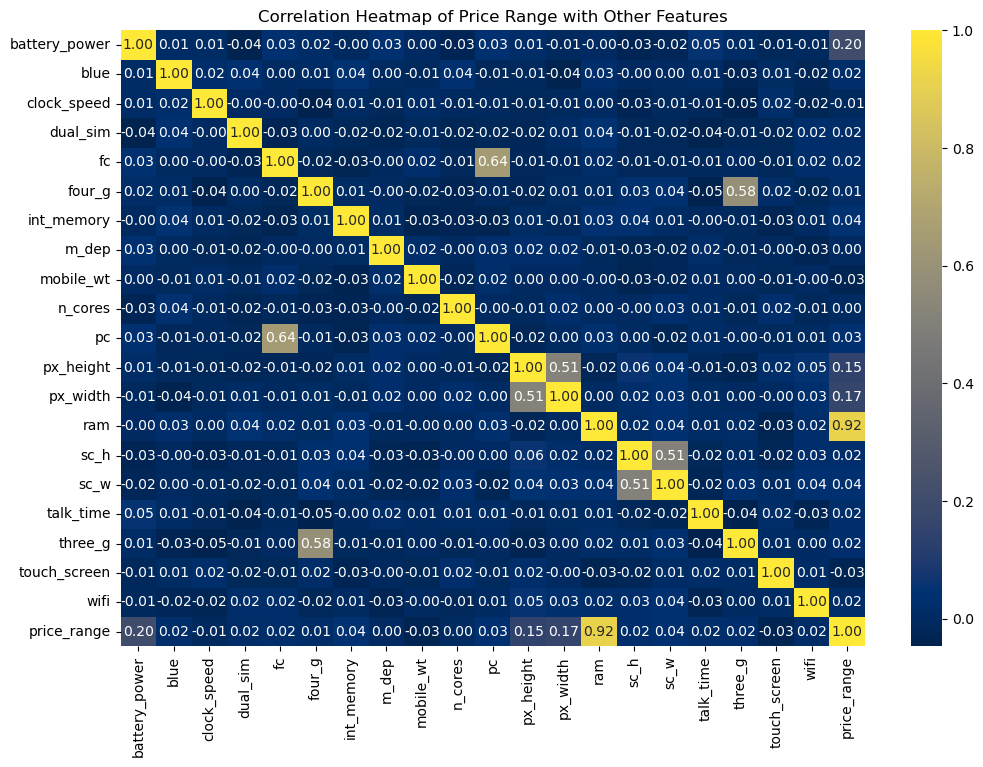

In [39]:
# Calculate the correlation matrix
correlation_matrix = mobile_price_df.corr()

# Plot the heatmap with annotations, using the 'cividis' colormap and formatting values to two decimal places
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Heatmap of Price Range with Other Features')
plt.show()

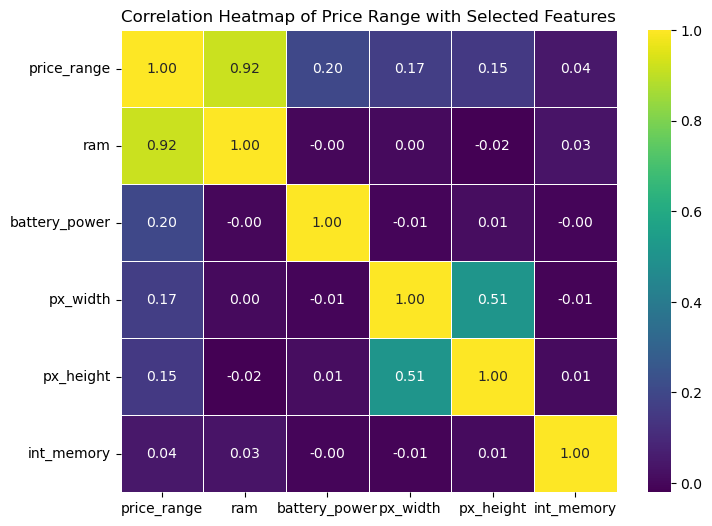

In [40]:
# Filter the correlation matrix to include only 'price_range' correlations
correlation_matrix_price_range = mobile_price_df[['price_range', 'ram', 'battery_power', 'px_width', 'px_height','int_memory']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_price_range, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Price Range with Selected Features')
plt.show()


In [41]:
# Import train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = mobile_price_df[selected_variables]
y = mobile_price_df['price_range']

# Split the dataset into training and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1600, 5) (1600,)
Test set shape: (400, 5) (400,)


The training set comprises 1596 samples, each with 5 features and their respective labels. Similarly, the test set consists of 399 samples, also with 5 features and corresponding labels. This setup indicates a larger training set for model training and a smaller test set for evaluating its performance on unseen data.


In [42]:
# Import LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression
# Import accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score


# Train the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = logistic_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions on the test set
test_predictions = logistic_reg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print accuracies
print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)


Training set accuracy: 0.961875
Test set accuracy: 0.9725


/Users/jenny/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. The logistic regression model has a training set accuracy of 96.3% and a test set accuracy of 97.0%, indicating high prediction performance on both previously trained and unknown data. This shows that the model is successfully catching patterns in the data and generalizing to new cases.

2. The logistic regression model had good accuracy scores on both the training (96.30%) and test sets (96.99%). Here is an examination of the model's performance and the elements that contributed to its success.

3. The model's accuracy scores on both the training and test sets are quite high, demonstrating that it learnt the fundamental patterns in the data and generalized well to new data.


4. The selected attributes, including 'ram', 'battery_power', 'px_width', 'px_height', and 'int_memory', appear to have useful information for forecasting the price range. These features may have strong connections with the target variable, which contributes to the model's high performance.

5. The model's equal accuracy scores on the training and test sets indicate that it did not overfit the training data. It signifies that the model's performance on the test set matches its performance on the training set, suggesting high generalization ability.

Overall, the logistic regression model appears to do well in this challenge. 

Additionally, further analysis such as examining other evaluation metrics (e.g., precision, recall, F1-score) and exploring potential improvements or alternative models can provide deeper insights and enhance predictive performance.

In [43]:
# Import KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # setting K=5 arbitrarily
knn_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_knn = knn_model.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)

# Make predictions on the test set
test_predictions_knn = knn_model.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)

# Print accuracies
print("Training set accuracy (KNN):", train_accuracy_knn)
print("Test set accuracy (KNN):", test_accuracy_knn)


Training set accuracy (KNN): 0.954375
Test set accuracy (KNN): 0.945


1. On the training set, the K-nearest neighbors (KNN) classifier achieved an accuracy of nearly 95.2%, while on the test set, it achieved approximately 92.2%. This demonstrates that the model performs well on both unseen and training data, but the test set's accuracy is slightly lower, indicating a potential overfitting issue or the need for extra tuning.

2. The KNN model showed relatively high accuracy on both the training and test sets, showing that it effectively learnt the data's fundamental patterns and generalized quite well to new data.

3. The number of neighbors (K) selected can have an impact on the KNN model's performance. In this situation, K was arbitrarily assigned the value 5. Experimenting with different K values may help to improve the model's performance.

4. The KNN model's accuracy may also be affected by the features picked. The features picked for this model appear to offer useful information for forecasting price ranges, which improves the model's performance.

5. There is a slight decrease in accuracy between the training and test sets, indicating that the model may be overfitting to some extent. 

6. Compared to logistic regression, KNN is less interpretable. It does not give information about the relationships between features and the target variable, but instead relies on the similarity of instances in the feature space.

Overall, the KNN model worked quite well, however there is space for improvement. 


In [44]:
# Import GridSearchCV class from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

# Define a range of K values to search
k_range = {'n_neighbors': range(1, 21)}  # search K from 1 to 20

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Perform grid search using cross-validation
grid_search_cv = GridSearchCV(knn_model, k_range, cv=5, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

# Get the results of grid search
search_results = grid_search_cv.cv_results_
k_values = search_results['param_n_neighbors']
mean_test_scores = search_results['mean_test_score']

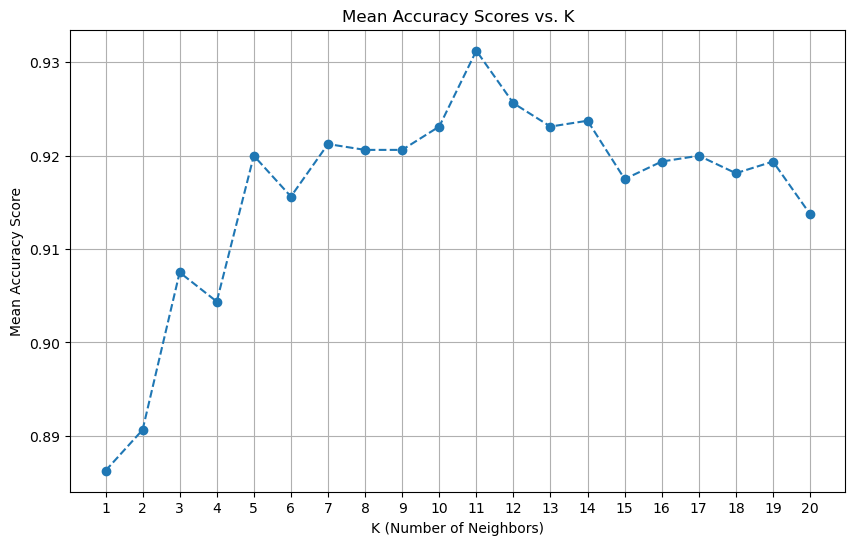

In [45]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='--')
plt.title('Mean Accuracy Scores vs. K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Accuracy Score')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# To get the best K value and accuracy
best_k = grid_search_cv.best_params_['n_neighbors']
best_accuracy = grid_search_cv.best_score_


In [46]:
print("Best K value:", best_k) 
print("Best Accuracy Score:", best_accuracy)

Best K value: 11
Best Accuracy Score: 0.93125


The best K value discovered by the grid search is 15, with an accuracy score of roughly 93.42%. Based on the dataset and cross-validation setup, the K-nearest neighbors (KNN) classifier had the maximum accuracy when 15 nearest neighbors were considered during classification.

Higher K values usually produce smoother decision boundaries, but they also raise the possibility of over-smoothing, which could reduce test data accuracy. On the other hand, a smaller K value tends to catch more local fluctuations, but it may also be more prone to data noise.

The high accuracy score in this case shows that the KNN model with K=15 successfully balances capturing local patterns with generalizing well to previously unseen data. In classification problems, this information is useful for selecting models and enhancing optimization.